**Read the file and convert it into supervised data**

In [28]:
import numpy as np
import pandas as pd
import warnings
import statsmodels.api as sm
from scikeras.wrappers import KerasRegressor
from sklearn.exceptions import ConvergenceWarning
from tensorflow.keras.optimizers import Adam



# Load data

features = ['ncloc', 'lines', 'files', 'classes', 'functions', 'comment_lines',
            'bugs', 'vulnerabilities', 'code_smells', 'uncovered_lines',
            'duplicated_lines', 'duplicated_blocks', 'duplicated_files', 'complexity',
            'LSC', 'LBC', 'LC', 'LTCE', 'CCC', 'LMC', 'MNC', 'sqale_index']
data = pd.read_csv('E:\\Experiment\\dataset\\Colossal-AI_dataset.csv')


# print(len(features))

# print(data[features].head())

time_steps = 2

# prediction period 
step_ahead = 7

# Standardized feature column
# scaler = StandardScaler()
# data[features] = scaler.fit_transform(data[features])

# Convert to Numpy array
values = data[features].values

# Convert time series data into supervised learning data
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()

    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [(f'var{j + 1}(t-{i})') for j in range(n_vars)]

    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [(f'var{j + 1}(t)') for j in range(n_vars)]
        else:
            names += [(f'var{j + 1}(t+{i})') for j in range(n_vars)]

    agg = pd.concat(cols, axis=1)
    agg.columns = names

    if dropnan:
        agg.dropna(inplace=True)
    return agg

reframed = series_to_supervised(values, n_in=time_steps, n_out=step_ahead)

X = reframed.iloc[:, np.r_[0:len(features)-1, len(features):2*len(features)-1]].values
y = reframed.iloc[:, -1].values



**linear**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle = False)

scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test = scaler_y.transform(y_test.reshape(-1, 1))

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

**Lasso**

In [27]:
# Use GridSearchCV to find the optimal parameters
from sklearn.linear_model import Lasso
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

parameters = [
        {'lasso__alpha': [0.1, 0.001, 0.0001, 0.00001],
        'lasso__max_iter': [40000, 100000]},
        ]

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle = False)

tscv = TimeSeriesSplit(n_splits=5)

grid_search = GridSearchCV(estimator = pipeline,
                           param_grid = parameters,
                           scoring='neg_mean_squared_error',
                           cv = tscv)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print(best_parameters)


{'lasso__alpha': 0.1, 'lasso__max_iter': 100000}


In [20]:
# training model
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle = False)

scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test = scaler_y.transform(y_test.reshape(-1, 1))

regressor = Lasso(alpha=0.01)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

**Ridge**

In [29]:
# Use GridSearchCV to find the optimal parameters
from sklearn.linear_model import Ridge
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

parameters = [
        {'ridge__alpha': [0.1, 0.01, 0.001]},
        ]

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

tscv = TimeSeriesSplit(n_splits=5)

grid_search = GridSearchCV(estimator = pipeline,
                           param_grid = parameters,
                           cv = tscv)
grid_search = grid_search.fit(X, y.ravel())
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print(best_parameters)

-99.75740219504479
{'ridge__alpha': 0.1}


In [ ]:
# training model
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle = False)

scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test = scaler_y.transform(y_test.reshape(-1, 1))
regressor = Ridge(alpha=0.1)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

**SGDRegressor**

In [ ]:
# Use GridSearchCV to find the optimal parameters
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV


pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('sgd', SGDRegressor(loss="squared_error", fit_intercept=True, learning_rate='invscaling'))  
])

parameters = {
    'sgd__eta0': [0.00001, 0.0001, 0.001, 0.01, 0.1]
}

tscv = TimeSeriesSplit(n_splits=5)

grid_search = GridSearchCV(estimator = pipeline,
                           param_grid = parameters,
                           scoring='neg_mean_squared_error',
                           cv = tscv)
grid_search = grid_search.fit(X, y.ravel())
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print(best_accuracy)
print(best_parameters)

In [ ]:
# training model
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle = False)

scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test = scaler_y.transform(y_test.reshape(-1, 1))

regressor = SGDRegressor(loss="squared_error", fit_intercept=True, learning_rate='invscaling', eta0=0.1)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

**SVR**

In [ ]:
# Use GridSearchCV to find the optimal parameters
from sklearn.svm import SVR
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('svr', SVR(kernel='linear'))  
])

parameters = {
    'svr__C': [10, 100, 1000, 10000]
}

tscv = TimeSeriesSplit(n_splits=5)

grid_search = GridSearchCV(estimator = pipeline,
                           param_grid = parameters,
                           scoring='neg_mean_squared_error',
                           cv = tscv)
grid_search = grid_search.fit(X, y.ravel())
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print(best_accuracy)
print(best_parameters)

In [ ]:
# Use GridSearchCV to find the optimal parameters
from sklearn.svm import SVR
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('svr', SVR(kernel='rbf'))  
])

parameters = {
    'svr__C': [10, 100, 1000, 10000],
    'svr__gamma': [0.1, 0.01, 0.001]
}

tscv = TimeSeriesSplit(n_splits=5)

grid_search = GridSearchCV(estimator = pipeline,
                           param_grid = parameters,
                           scoring='neg_mean_squared_error',
                           cv = tscv)
grid_search = grid_search.fit(X, y.ravel())
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print(best_accuracy)
print(best_parameters)

In [ ]:
# training model
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle = False)

scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test = scaler_y.transform(y_test.reshape(-1, 1))
# regressor = SVR(kernel='linear', C=10000)
regressor = SVR(kernel='rbf', C=10000, gamma=0.1)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

**RandomForestRegressor**

In [ ]:
# Use GridSearchCV to find the optimal parameters
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV


pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('rf', RandomForestRegressor())  
])

parameters = {
    'rf__n_estimators': [50, 100, 150, 200],
    'rf__max_depth': [10, 15, 20, 25, 30]
    # 'rf__min_samples_split': [2, 5, 10],
    # 'rf__min_samples_leaf': [1, 2, 4]
}

tscv = TimeSeriesSplit(n_splits=5)

grid_search = GridSearchCV(estimator = pipeline,
                           param_grid = parameters,
                           scoring='neg_mean_squared_error',
                           cv = tscv)
grid_search = grid_search.fit(X, y.ravel())
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print(best_accuracy)
print(best_parameters)

In [ ]:
# training model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle = False)

scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test = scaler_y.transform(y_test.reshape(-1, 1))

regressor = RandomForestRegressor(n_estimators=50, max_depth=25)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

**反标准化**

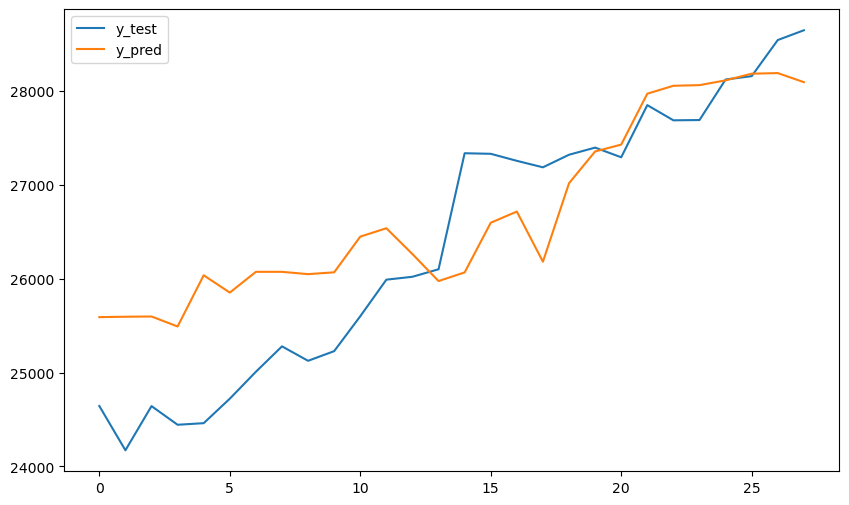

MAE:653.8540143522072
RMSE:788.6827372012852
MAPE:2.5482442878396716


In [21]:
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler_y.inverse_transform(y_test)


mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# plt.figure(figsize=(10, 6))
# plt.plot(y_test, label='y_test')
# plt.plot(y_pred, label='y_pred')
# plt.legend()
# plt.show()

print(f'MAE:{mae}')
print(f'RMSE:{rmse}')
print(f'MAPE:{mape}')
 